# <center> Stock prediction with RNN and LSTM <center>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from pandas_datareader import data, wb
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.layers import *
from keras.models import *

In [13]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2019-01-01')
traindf = data.DataReader('PYPL', 'yahoo', start, end)
traindf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-06,39.750000,36.000000,38.000000,36.709999,5866600,36.709999
2015-07-07,37.810001,36.000000,37.720001,36.619999,7359000,36.619999
2015-07-08,36.360001,34.529999,36.340000,34.700001,5387700,34.700001
2015-07-09,35.520000,33.990002,35.099998,34.500000,3760100,34.500000
2015-07-10,35.189999,33.980000,34.660000,34.689999,4472800,34.689999
...,...,...,...,...,...,...
2018-12-24,79.320000,76.699997,77.480003,77.059998,6800500,77.059998
2018-12-26,82.800003,77.650002,77.699997,82.800003,10994700,82.800003
2018-12-27,84.360001,80.239998,81.330002,84.309998,7849100,84.309998


In [14]:
start = pd.to_datetime('2019-01-02')
end = pd.to_datetime('2020-11-01')
testdf = data.DataReader('PYPL', 'yahoo', start, end)
testdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,86.199997,82.239998,82.379997,85.750000,10146200,85.750000
2019-01-03,84.750000,81.910004,84.360001,82.089996,9650700,82.089996
2019-01-04,86.910004,83.370003,83.709999,86.269997,9234800,86.269997
2019-01-07,87.550003,86.019997,86.419998,86.930000,11094100,86.930000
2019-01-08,88.894997,87.690002,88.110001,88.699997,8307600,88.699997
...,...,...,...,...,...,...
2020-10-26,203.889999,195.050003,200.660004,197.220001,7716000,197.220001
2020-10-27,201.320007,197.720001,198.789993,200.429993,4754400,200.429993
2020-10-28,198.389999,191.500000,196.960007,192.309998,8050000,192.309998


In [16]:
trainingdf = traindf.drop(['Adj Close'], axis = 1)
trainingdf.head()

,High,Low,Open,Close,Volume
Date,,,,,
2015-07-06,39.750000,36.000000,38.000000,36.709999,5866600
2015-07-07,37.810001,36.000000,37.720001,36.619999,7359000
2015-07-08,36.360001,34.529999,36.340000,34.700001,5387700
2015-07-09,35.520000,33.990002,35.099998,34.500000,3760100
2015-07-10,35.189999,33.980000,34.660000,34.689999,4472800


In [17]:
scaler = MinMaxScaler()
trainingdf = scaler.fit_transform(trainingdf)
trainingdf

array([[0.13569369, 0.09668064, 0.11550836, 0.09737348, 0.07443608],
       [0.10461392, 0.09668064, 0.11100388, 0.09593209, 0.10419296],
       [0.08138418, 0.07299386, 0.08880309, 0.0651826 , 0.06488732],
       ...,
       [0.85036852, 0.80953915, 0.81258042, 0.85970528, 0.11396504],
       [0.86430641, 0.84337735, 0.87162158, 0.84288921, 0.09405201],
       [0.85229103, 0.84676128, 0.85939503, 0.85618188, 0.10197376]])

In [22]:
X_train = []
y_train = []

In [20]:
trainingdf.shape[0]

880

In [23]:
for i in range(60, trainingdf.shape[0]) :
  X_train.append(trainingdf[i - 60:i])
  y_train.append(trainingdf[i, 0])

In [24]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [25]:
X_train.shape, y_train.shape

((820, 60, 5), (820,))

In [35]:
#Build LSTM
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))
regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))
regressor.add(Dense(units = 1))

In [36]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 120)              

In [38]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [39]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
26/26 [==============================] - 4s 157ms/step - loss: 0.1069
Epoch 2/10
26/26 [==============================] - 4s 148ms/step - loss: 0.0196
Epoch 3/10
26/26 [==============================] - 4s 150ms/step - loss: 0.0139
Epoch 4/10
26/26 [==============================] - 4s 147ms/step - loss: 0.0103
Epoch 5/10
26/26 [==============================] - 4s 151ms/step - loss: 0.0098
Epoch 6/10
26/26 [==============================] - 4s 155ms/step - loss: 0.0092
Epoch 7/10
26/26 [==============================] - 4s 155ms/step - loss: 0.0094
Epoch 8/10
26/26 [==============================] - 4s 153ms/step - loss: 0.0082
Epoch 9/10
26/26 [==============================] - 4s 152ms/step - loss: 0.0085
Epoch 10/10
26/26 [==============================] - 4s 162ms/step - loss: 0.0084


In [37]:
testdf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,86.199997,82.239998,82.379997,85.750000,10146200,85.750000
2019-01-03,84.750000,81.910004,84.360001,82.089996,9650700,82.089996
2019-01-04,86.910004,83.370003,83.709999,86.269997,9234800,86.269997
2019-01-07,87.550003,86.019997,86.419998,86.930000,11094100,86.930000
2019-01-08,88.894997,87.690002,88.110001,88.699997,8307600,88.699997


In [41]:
testdf.tail(60)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-07,203.951004,196.699997,203.710007,198.630005,6521200,198.630005
2020-08-10,199.850006,191.690002,198.699997,193.320007,8792200,193.320007
2020-08-11,193.535004,186.520004,192.000000,189.029999,9155300,189.029999
2020-08-12,192.509995,189.399994,190.000000,191.320007,7940000,191.320007
2020-08-13,195.130005,191.479996,192.100006,193.070007,10082400,193.070007
2020-08-14,195.468994,190.509995,195.190002,191.460007,4848000,191.460007
2020-08-17,197.419998,193.250000,193.919998,196.289993,6279300,196.289993
2020-08-18,198.750000,194.000000,197.729996,194.570007,5362500,194.570007
2020-08-19,196.839996,191.919998,195.059998,192.440002,6865300,192.440002


In [42]:
past_60_days = testdf.tail(60)

In [45]:
df = past_60_days.append(testdf, ignore_index = True)
df = df.drop(['Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,203.951004,196.699997,203.710007,198.630005,6521200
1,199.850006,191.690002,198.699997,193.320007,8792200
2,193.535004,186.520004,192.000000,189.029999,9155300
3,192.509995,189.399994,190.000000,191.320007,7940000
4,195.130005,191.479996,192.100006,193.070007,10082400


In [46]:
inputs = scaler.transform(df)
inputs

array([[2.76627705, 2.68611027, 2.78137061, 2.69058303, 0.08748811],
       [2.70057699, 2.60538203, 2.700772  , 2.60554143, 0.13276946],
       [2.59940744, 2.52207558, 2.5929857 , 2.53683533, 0.14000929],
       ...,
       [2.67718694, 2.60232044, 2.67277988, 2.58936574, 0.11797077],
       [2.66437048, 2.61537228, 2.62644776, 2.63308765, 0.10953859],
       [2.62816423, 2.4640671 , 2.61373848, 2.49039085, 0.1973218 ]])

In [47]:
X_test = []
y_test = []
for i in range(60, inputs.shape[0]) : 
  X_test.append(inputs[i - 60:i])
  y_test.append(inputs[i, 0])

In [48]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((463, 60, 5), (463,))

In [49]:
y_pred = regressor.predict(X_test)

In [50]:
scaler.scale_

array([1.60205072e-02, 1.61134392e-02, 1.60875151e-02, 1.60153746e-02,
       1.99389469e-08])

In [52]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [53]:
y_pred = y_pred * scale
y_test = y_test * scale

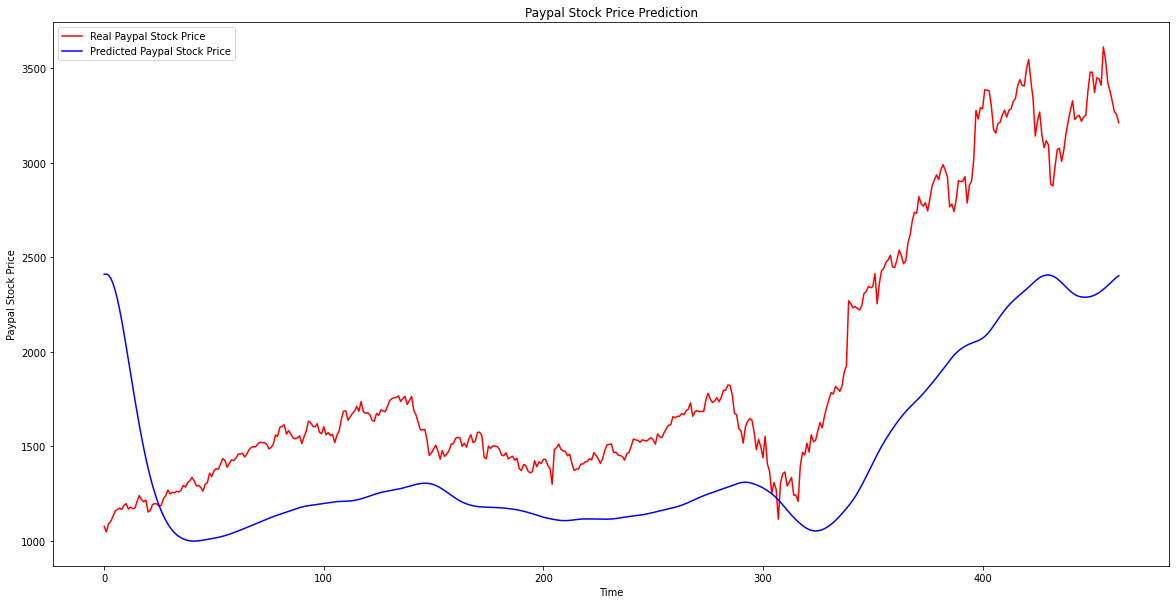

In [56]:
# Visualize the results
plt.figure(figsize = (20, 10))
plt.plot(y_test, color = 'red', label = 'Real Paypal Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Paypal Stock Price')
plt.title('Paypal Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Paypal Stock Price')
plt.legend()
plt.show()